## Libraries

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

## Import dataframes

In [113]:
df_all_items = pd.read_csv('data/df_all_items.csv')
df_all_questions = pd.read_csv('data/df_all_questions.csv')
df_all_feedback = pd.read_csv('data/df_all_feedback.csv')
df_all_visits = pd.read_csv('data/df_all_visits.csv')

In [114]:
df_all_items.head(2)

,id,site_id,title,seller,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,seller_address,attributes,differential_pricing,original_price,category_id,official_store_id,catalog_product_id,tags,index_character,smaller_title
0,MLA817802367,MLA,Chocolate Banco De Alimentos - Prod Virtual D...,"{'id': 467409779, 'permalink': 'http://perfil....",127,ARS,5000,5,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'id': 'BRAND', 'name': 'Marca', 'value_name'...",{'id': 33678187},NaN,MLA376491,1871,NaN,"['brand_verified', 'good_quality_picture', 'in...",10,Chocolate
1,MLA817793200,MLA,Agua Banco De Alimentos- Productos Virtuales D...,"{'id': 467409779, 'permalink': 'http://perfil....",76,ARS,500,50,buy_it_now,gold_pro,...,"{'id': '', 'comment': '', 'address_line': '', ...","[{'attribute_group_id': 'OTHERS', 'source': 83...",{'id': 33678187},NaN,MLA418070,1871,NaN,"['brand_verified', 'good_quality_picture', 'go...",4,Agua


## Descriptive

In [115]:
total_sold_quantity = df_all_items['sold_quantity'].sum()
print(f'Sold quantity = {total_sold_quantity}')

Sold quantity = 292


In [116]:
df_all_items['total'] = df_all_items['price'] * df_all_items['sold_quantity']
total_amount = df_all_items['total'].sum()
print(f'Total amount(ARS) = {total_amount}')

Total amount(ARS) = 89646


## Plots

No handles with labels found to put in legend.


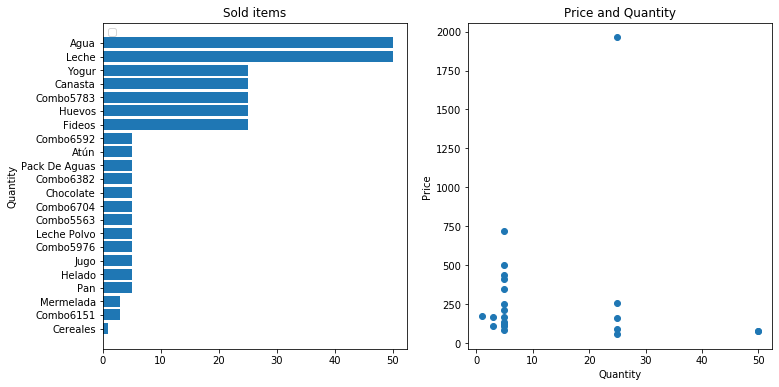

In [117]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                            figsize=(12,6))

# Bar
df_all_items = df_all_items.sort_values(by = 'sold_quantity')
ax1.barh(df_all_items['smaller_title'], df_all_items['sold_quantity'])
ax1.set_title('Sold items')
ax1.legend(loc='upper left')
ax1.set_ylabel('Quantity')

# Scatter 
# Adding en axes (stackplot)
ax2.scatter(df_all_items['sold_quantity'], df_all_items['price'])
ax2.set_title('Price and Quantity')
#ax.legend(loc='upper left')
ax2.set_ylabel('Price')
ax2.set_xlabel('Quantity')

# Plot
fig.tight_layout # clean up whitespaces
plt.show()

### Visits

In [118]:
df_all_visits = df_all_visits.loc[df_all_visits['date'] > '2019-11-15']
items = df_all_visits.columns

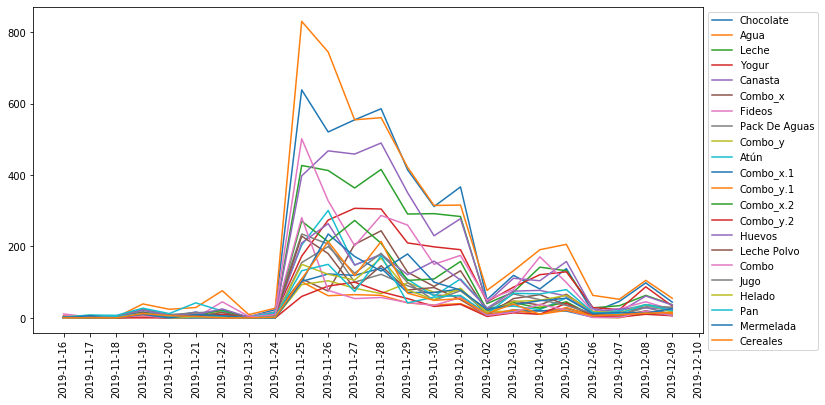

In [123]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,
                            figsize=(12,6))

for item in items[1:len(items)]:
    ax1.plot(df_all_visits['date'], df_all_visits[item], label = item)
    ax1.tick_params(axis='x', rotation=90)

plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
fig.tight_layout # clean up whitespaces
plt.show()


### Questions

In [120]:
df_all_questions.head()

,date_created,item_id,seller_id,status,text,answer,smaller_title
0,2019-12-05T19:44:22.000-04:00,MLA817802367,467409779,ANSWERED,Hola buenos días me llamo Juan Armua. Soy ven...,"{'text': '¡Hola! Los productos ""Banco de Alime...",Chocolate
1,2019-11-29T14:41:53.000-04:00,MLA817802367,467409779,ANSWERED,Cuáles son los medios de pago?,{'text': '¡Buenas tardes Marina! Los medios de...,Chocolate
2,2019-12-05T07:06:39.000-04:00,MLA817793200,467409779,ANSWERED,Hola les envié un mensaje y todavía no me resp...,"{'text': '¡Hola! Los productos ""Banco de Alime...",Agua
3,2019-12-05T09:10:56.000-04:00,MLA817793200,467409779,ANSWERED,"¿ONG Mercado libre solidario""? .. pero ellos t...",{'text': 'Hola! gracias por escribirnos! Merca...,Agua
4,2019-11-29T16:25:08.000-04:00,MLA817793200,467409779,ANSWERED,Espero que esto sirva. Voy a confiar. ¿,{'text': 'Hola! ¡Gracias por escribirnos! Somo...,Agua


In [121]:
df_all_questions.groupby('smaller_title').count().sort_values(by=['text'], ascending=False)

,date_created,item_id,seller_id,status,text,answer
smaller_title,,,,,,
Canasta,8,8,8,8,8,7
Agua,7,7,7,7,7,7
Combo,7,7,7,7,7,7
Helado,5,5,5,5,5,5
Pack De Aguas,5,5,5,5,5,5
Huevos,4,4,4,4,4,4
Atún,3,3,3,3,3,3
Fideos,3,3,3,3,3,3
Jugo,3,3,3,3,3,2


### Feedback

In [122]:
df_all_feedback

,id,reviewable_object,date_created,status,title,content,rate,valorization,likes,dislikes,reviewer_id,buying_date,relevance,forbidden_words
0,50507417,"{'id': 'MLA817804577', 'type': 'item'}",2019-12-01T02:14:33Z,published,Excelent iniciativa,"Buenísima idea!!! que más gente se una, no pue...",5,0,0,0,259456243,2019-11-29T04:00:00Z,15,0
1,50255941,"{'id': 'MLA817804577', 'type': 'item'}",2019-11-27T21:18:51Z,published,Excelente,Hace bien al corazón! lo recomiendo! éxitos!!.,5,0,0,0,3011712,2019-11-26T04:00:00Z,7,0
2,51008465,"{'id': 'MLA817805783', 'type': 'item'}",2019-12-07T13:53:46Z,published,Excelente iniciativa,"Excelente iniciativa, una buena idea para cola...",5,0,0,0,125859532,2019-11-30T04:00:00Z,7,0
